In [1]:
# ============================================================
#                1. IMPORT LIBRARIES
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")


In [2]:
# ============================================================
#                2. LOAD THE CSV FILE
# ============================================================

df = pd.read_csv("train.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

df.head()


Dataset Loaded Successfully!
Shape: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [3]:
# ============================================================
#                3. BASIC DATA CHECKS
# ============================================================

print("\n--- COLUMN NAMES ---")
print(df.columns.tolist())

print("\n--- DATA TYPES ---")
print(df.dtypes)

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

print("\n--- DUPLICATES ---")
print("Duplicate Rows:", df.duplicated().sum())



--- COLUMN NAMES ---
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

--- DATA TYPES ---
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

--- MISSING VALUES ---
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Regi

In [4]:
# ============================================================
#      4. CLEAN COLUMN NAMES (Professional Standard)
# ============================================================

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [5]:
# ============================================================
#      5. HANDLE DUPLICATES
# ============================================================

print("Duplicates Before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates After:", df.duplicated().sum())


Duplicates Before: 0
Duplicates After: 0


In [6]:
# ============================================================
#      6. HANDLE MISSING VALUES (Advanced Strategy)
# ============================================================

# Categorical: fill with "Unknown"
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Numerical: fill with median (safer than mean)
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("\nAfter Filling Missing Values:")
print(df.isnull().sum())



After Filling Missing Values:
row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64


In [7]:
# ============================================================
#      7. AUTOMATIC DETECTION & CONVERSION OF DATE COLUMNS
# ============================================================

date_cols = [col for col in df.columns if "date" in col]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("\nConverted Date Columns:", date_cols)

df.head()



Converted Date Columns: ['order_date', 'ship_date']


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [8]:
# ============================================================
#      8. FEATURE ENGINEERING (Professional)
# ============================================================

# For date columns: extract year, month, day
for col in date_cols:
    df[col+"_year"] = df[col].dt.year
    df[col+"_month"] = df[col].dt.month
    df[col+"_day"] = df[col].dt.day

# Sales → Profit → create ratios if exist
if "sales" in df.columns and "quantity" in df.columns:
    df["sales_per_unit"] = df["sales"] / df["quantity"].replace(0, np.nan)

if "sales" in df.columns and "profit" in df.columns:
    df["profit_margin"] = df["profit"] / df["sales"].replace(0, np.nan)

print("\nNew Engineered Columns Added!")
df.head()



New Engineered Columns Added!


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,order_date_day,ship_date_year,ship_date_month,ship_date_day
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,"2,017.00",8.00,11.00,"2,017.00",11.00,11.00
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.00",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,"2,017.00",8.00,11.00,"2,017.00",11.00,11.00
2,3,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.00",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,"2,017.00",12.00,6.00,NaN,NaN,NaN
3,4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,"2,016.00",11.00,10.00,NaN,NaN,NaN
4,5,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.00",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,"2,016.00",11.00,10.00,NaN,NaN,NaN


In [9]:
# ============================================================
#      9. DATA SUMMARY (NUMERICAL + CATEGORICAL)
# ============================================================

print("\n--- NUMERICAL SUMMARY ---")
display(df.describe().T)

print("\n--- CATEGORICAL SUMMARY ---")
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())



--- NUMERICAL SUMMARY ---


,count,mean,min,25%,50%,75%,max,std
row_id,"9,800.00","4,900.50",1.00,"2,450.75","4,900.50","7,350.25","9,800.00","2,829.16"
order_date,3959,2017-03-14 18:19:11.199798016,2015-01-02 00:00:00,2016-04-05 00:00:00,2017-05-02 00:00:00,2018-03-07 00:00:00,2018-12-11 00:00:00,NaN
ship_date,3815,2017-04-09 17:04:02.516382720,2015-01-04 00:00:00,2016-04-12 00:00:00,2017-06-06 00:00:00,2018-05-01 00:00:00,2019-05-01 00:00:00,NaN
postal_code,"9,800.00","55,276.50","1,040.00","23,223.00","58,103.00","90,008.00","99,301.00","32,023.37"
sales,"9,800.00",230.77,0.44,17.25,54.49,210.61,"22,638.48",626.65
order_date_year,"3,959.00","2,016.73","2,015.00","2,016.00","2,017.00","2,018.00","2,018.00",1.12
order_date_month,"3,959.00",6.45,1.00,3.00,6.00,9.00,12.00,3.50
order_date_day,"3,959.00",8.02,1.00,5.00,9.00,11.00,12.00,3.27
ship_date_year,"3,815.00","2,016.79","2,015.00","2,016.00","2,017.00","2,018.00","2,019.00",1.13
ship_date_month,"3,815.00",6.57,1.00,4.00,7.00,10.00,12.00,3.45



--- CATEGORICAL SUMMARY ---

Column: order_id
order_id
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
Name: count, dtype: int64

Column: order_date
order_date
2017-05-09    38
2017-10-11    35
2018-01-12    34
2018-02-12    34
2018-02-09    33
Name: count, dtype: int64

Column: ship_date
ship_date
2018-06-12    32
2018-12-12    30
2018-06-09    30
2018-08-09    27
2017-07-09    26
Name: count, dtype: int64

Column: ship_mode
ship_mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

Column: customer_id
customer_id
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
JD-15895    32
Name: count, dtype: int64

Column: customer_name
customer_name
William Brown       35
Matt Abelman        34
Paul Prost          34
John Lee            33
Jonathan Doherty    32
Name: count, dtype: int64

Column: segment
segment
Consumer       5101
Corporate      2953
Home Of

In [10]:
# ============================================================
#       10. OUTLIER DETECTION USING IQR (Industry Standard)
# ============================================================

def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return df[(df[col] < lower) | (df[col] > upper)]

print("\n--- OUTLIER REPORT ---")
for col in num_cols:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers")



--- OUTLIER REPORT ---
row_id: 0 outliers
postal_code: 0 outliers
sales: 1145 outliers


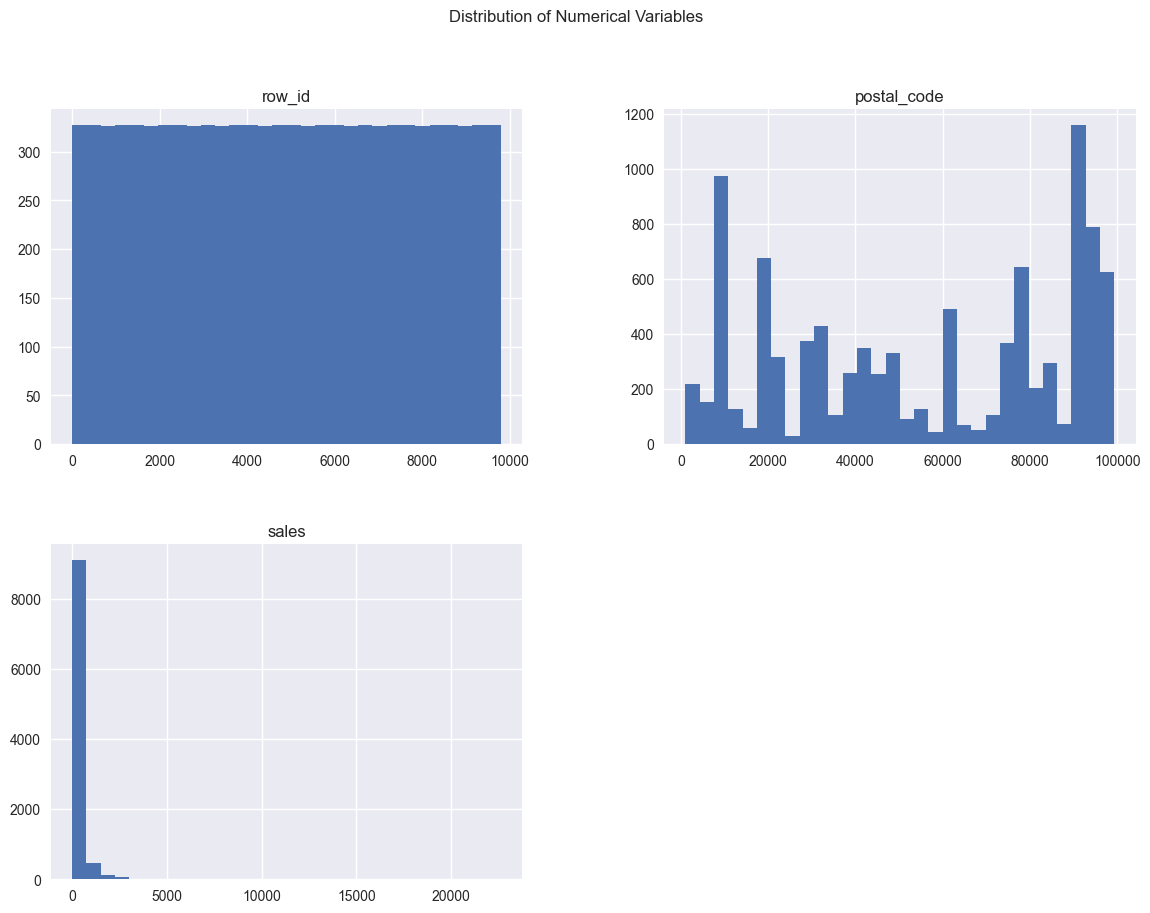

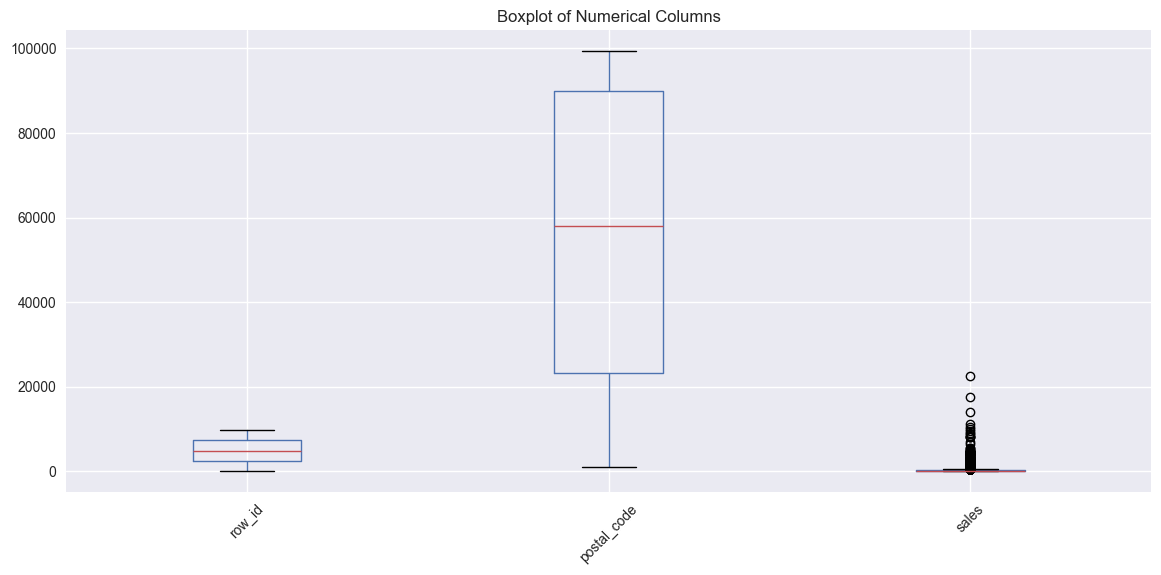

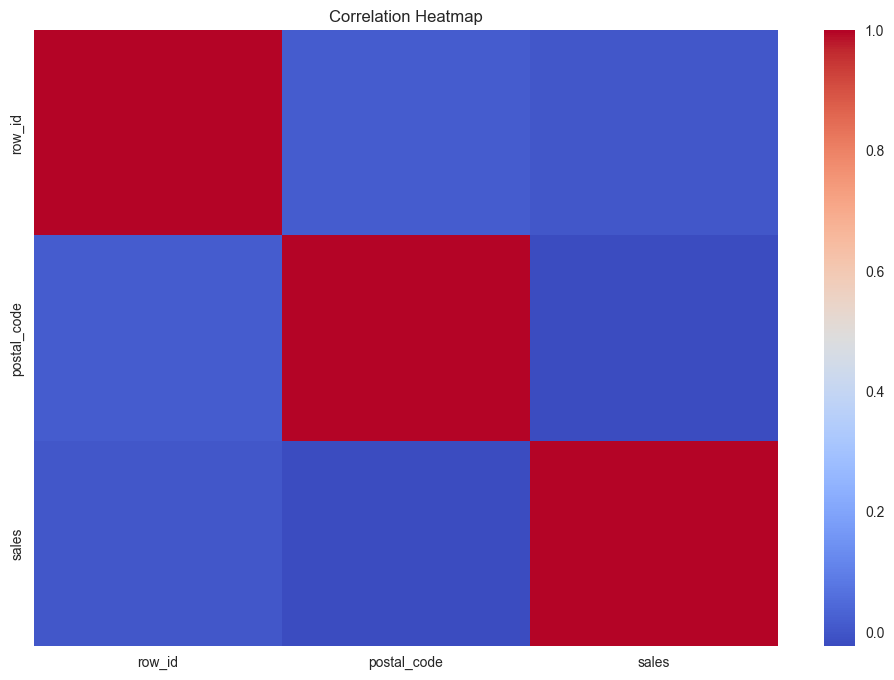

In [11]:
# ============================================================
#                      11. VISUALIZATIONS
# ============================================================

plt.style.use("seaborn-v0_8")

# Histogram
df[num_cols].hist(figsize=(14,10), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

# Boxplots
plt.figure(figsize=(14,6))
df[num_cols].boxplot()
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


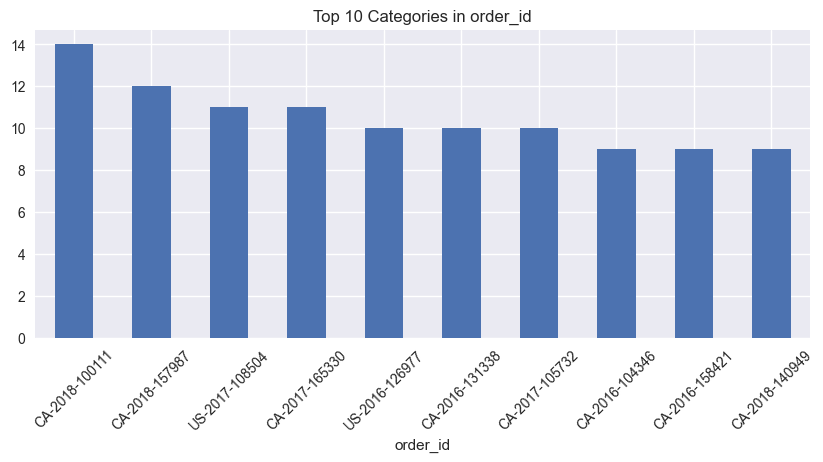

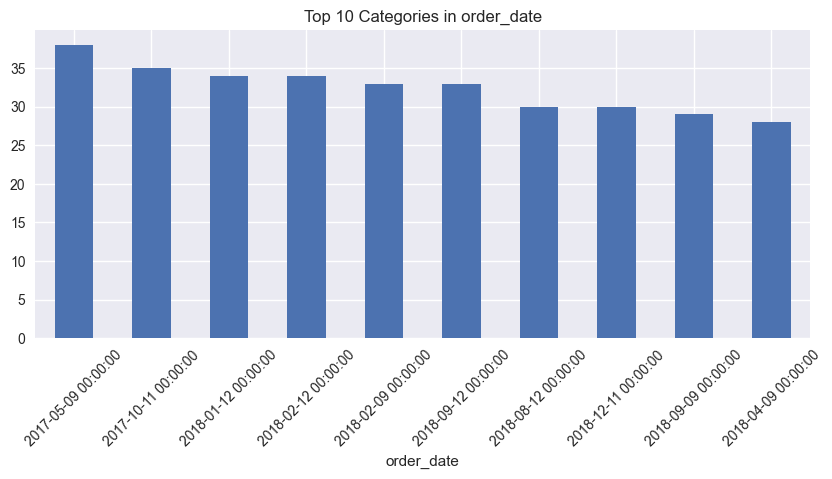

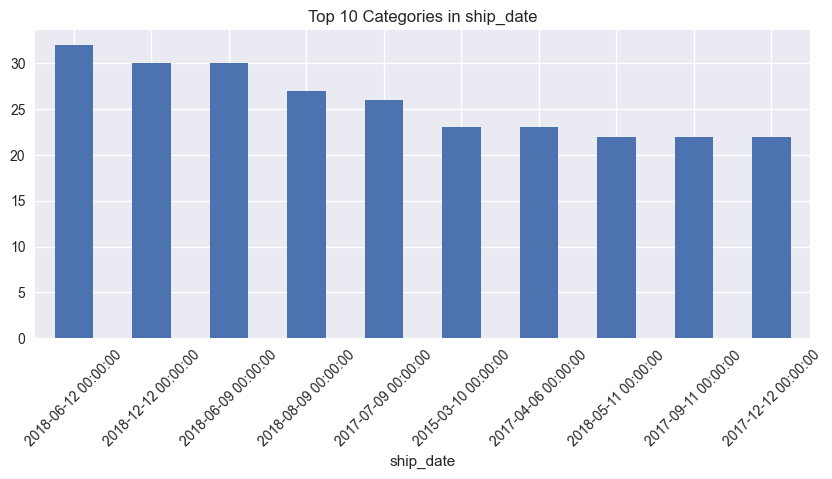

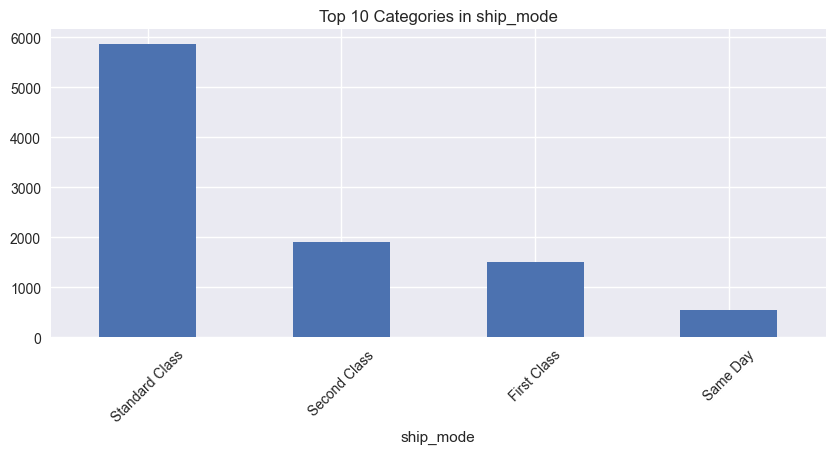

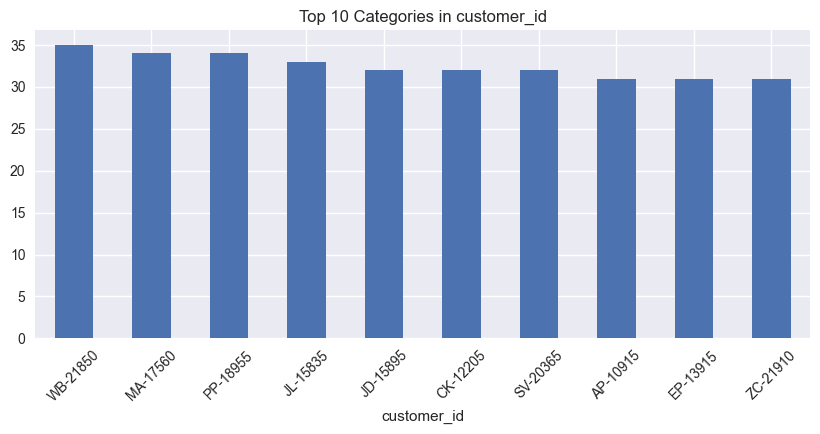

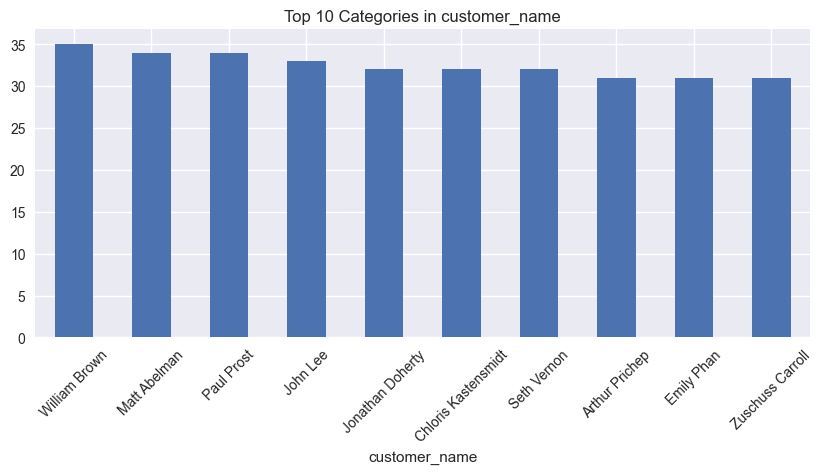

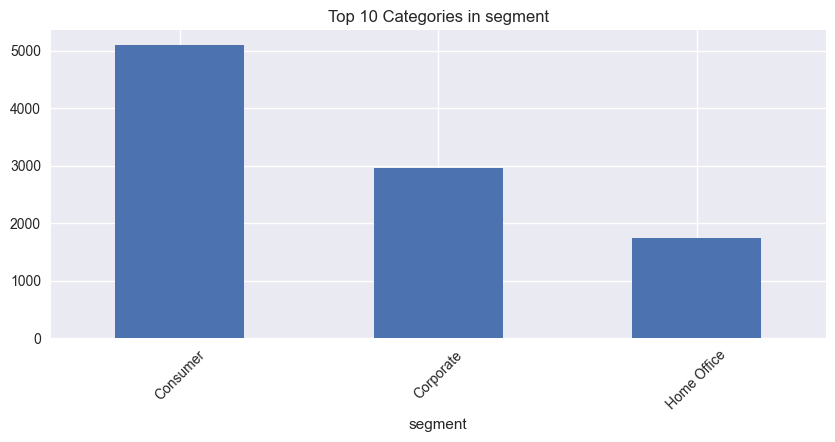

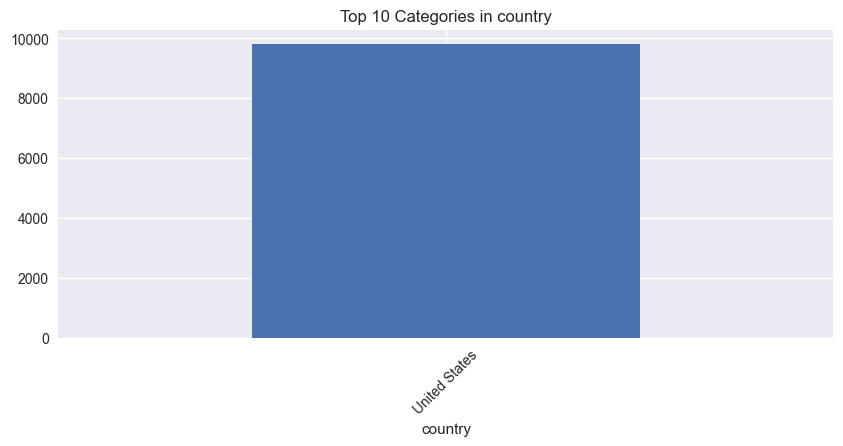

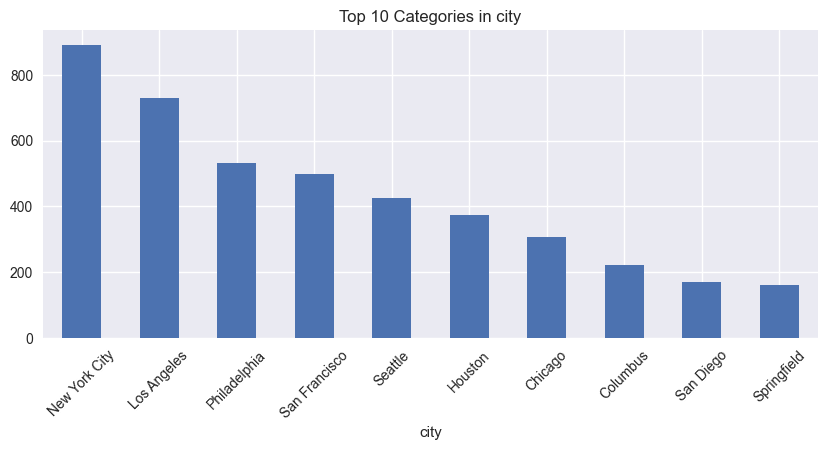

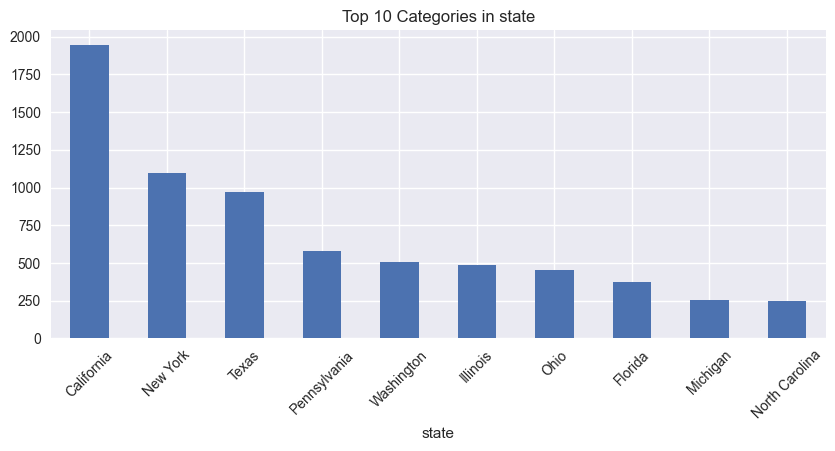

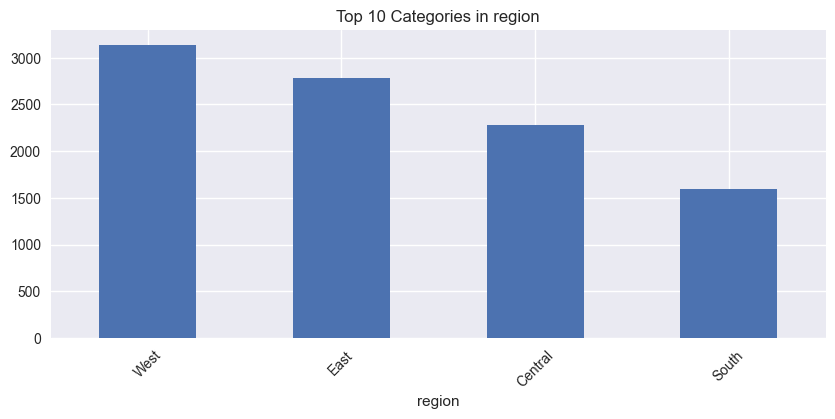

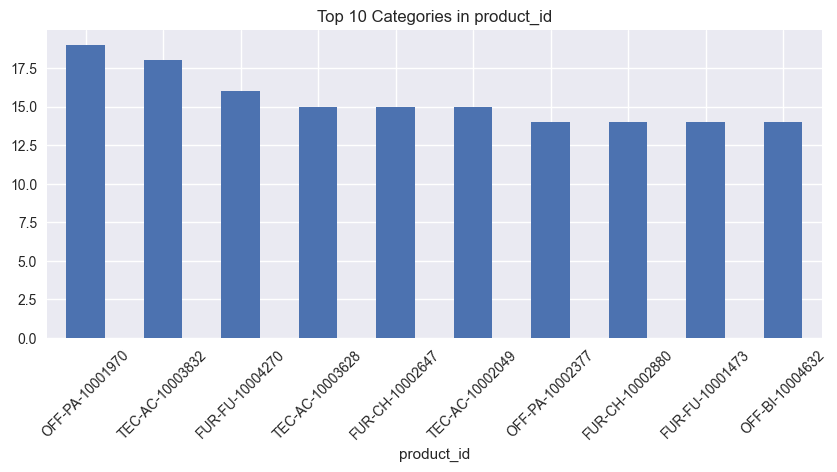

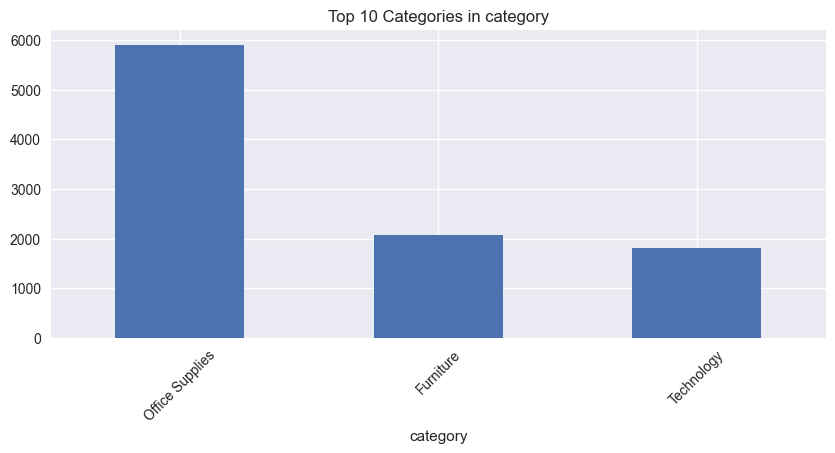

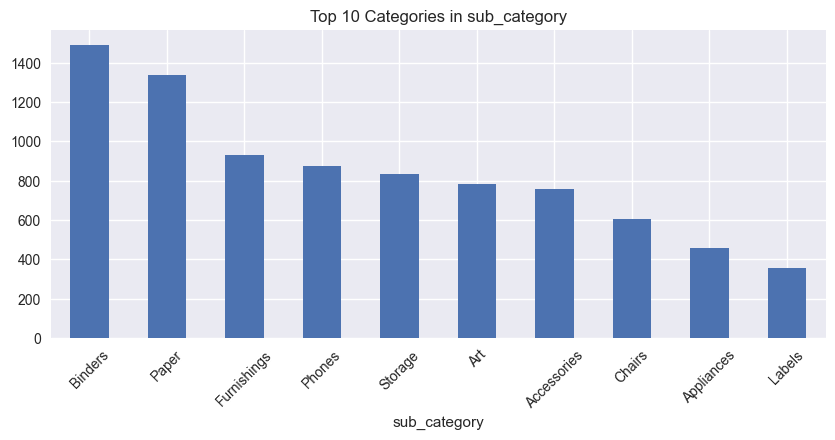

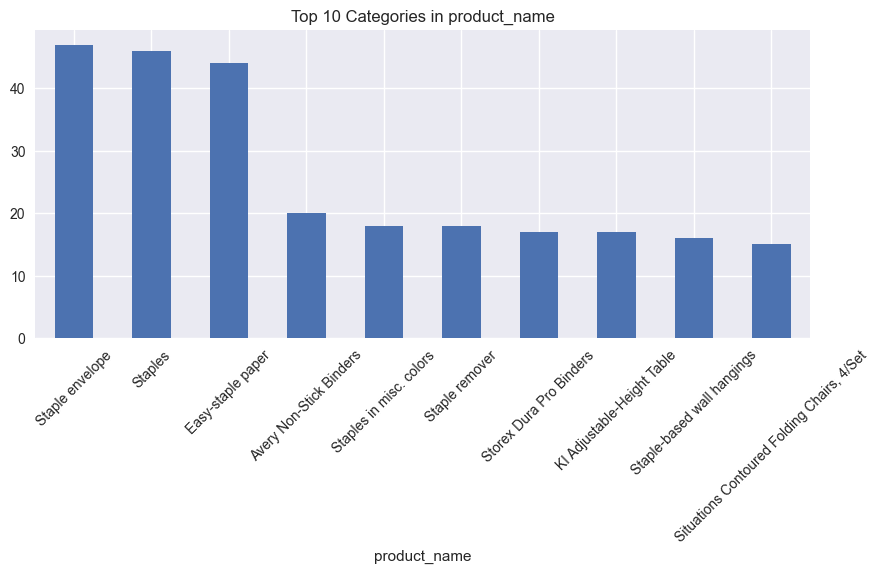

In [12]:
# ============================================================
#            12. CATEGORY-WISE ANALYSIS (AUTO)
# ============================================================

for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


In [13]:
# ============================================================
#            13. AUTOMATED INSIGHTS (PRO LEVEL)
# ============================================================

print("\n================ AUTOMATED INSIGHTS ================\n")

# Profitability
if "profit" in df.columns:
    total_profit = df["profit"].sum()
    print("Total Profit:", round(total_profit, 2))

# Top category by sales
if "sales" in df.columns:
    best_cat = df.groupby(cat_cols[0])["sales"].sum().idxmax()
    print("Best Performing Category:", best_cat)

# Seasonal trend
if date_cols:
    month_sales = df.groupby(df[date_cols[0]].dt.month)["sales"].sum()
    print("Top Sales Month:", month_sales.idxmax())

print("\n====================================================")



================ AUTOMATED INSIGHTS ================

Best Performing Category: CA-2015-145317
Top Sales Month: 2.0



In [14]:
# ============================================================
#                14. SAVE CLEANED DATASET
# ============================================================

df.to_csv("cleaned_train.csv", index=False)
print("Cleaned dataset saved as cleaned_train.csv")

Cleaned dataset saved as cleaned_train.csv
